In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
class MyCNN(nn.Module):
    def __init__(self, dim1, dim2, dim3, dim4, output_features):
        super(MyCNN, self).__init__()
        self.model1 = nn.Sequential(
            nn.Conv1d(1, 16, 2), nn.ReLU(),
            nn.MaxPool1d(2), nn.Conv1d(16, 32, 2),
            nn.ReLU(), nn.MaxPool1d(2), nn.Flatten(),  
        )
        self.model2 = nn.Sequential(
            nn.Linear(32, dim1), nn.ReLU(),
            nn.Linear(dim1, dim2), nn.ReLU(),
            nn.Linear(dim2, dim3), nn.ReLU(),
            nn.Linear(dim3, dim4), nn.ReLU(),
            nn.Linear(dim4, output_features), nn.Sigmoid()
        )

    def forward(self, input):
        input = input.reshape(-1, 1, 8)   
        x = self.model1(input)
        x = self.model2(x)
        return x  

network = MyCNN(5, 3, 4, 2, 1)  

In [52]:
# Data Preparation
x_train, x_val_tes, y_train, y_val_tes = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_tes, y_val_tes, test_size=0.5)
# Training
X_train = torch.Tensor(x_train.values)
Y_train = torch.Tensor(y_train.values)
# Validation
X_val = torch.Tensor(x_val.values)
Y_val = torch.Tensor(y_val.values)
# Testing
X_test = torch.Tensor(x_test.values)
Y_test = torch.Tensor(y_test.values)
# Training Loader
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=10, shuffle=True)

In [76]:
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.model1 = nn.Sequential(
            nn.Conv1d(1, 16, 2),
            nn.ReLU(),
            nn.MaxPool1d(2),  # torch.Size([128, 16, 5])
            nn.Conv1d(16, 32, 2),
            nn.ReLU(),
            nn.MaxPool1d(2),  # torch.Size([128, 32, 1])
            nn.Flatten(),  # torch.Size([128, 32])    (假如上一步的结果为[128, 32, 2]， 那么铺平之后就是[128, 64])
        )
        self.model2 = nn.Sequential(
            nn.Linear(in_features=32, out_features=1, bias=True),
            nn.Sigmoid()
        )

    def forward(self, input):
        input = input.reshape(-1, 1, 8)   #结果为[128,1,11]  目的是把二维变为三维数据
        x = self.model1(input)
        x = self.model2(x)
        return x

network = Tudui()
loss_function = nn.BCELoss()
learning_rate = 0.01
optim = torch.optim.Adam(network.parameters(), lr=learning_rate)

In [77]:
epochs = 500
final_loss = []

for epoch in range(epochs):
    running_loss =0.
    
    for data in train_loader:
        inputs, outputs = data
        
        predictions = network(inputs)
        loss = loss_function(predictions, outputs)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        running_loss += loss.item()
    final_loss.append(running_loss/len(train_loader))
    print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

Epoch   1: loss 0.51669
Epoch   2: loss 0.45693
Epoch   3: loss 0.42174
Epoch   4: loss 0.41094
Epoch   5: loss 0.38370
Epoch   6: loss 0.37706
Epoch   7: loss 0.37593
Epoch   8: loss 0.35487
Epoch   9: loss 0.34605
Epoch  10: loss 0.32713
Epoch  11: loss 0.34311
Epoch  12: loss 0.32656
Epoch  13: loss 0.34047
Epoch  14: loss 0.32559
Epoch  15: loss 0.33271
Epoch  16: loss 0.33682
Epoch  17: loss 0.32670
Epoch  18: loss 0.30674
Epoch  19: loss 0.34937
Epoch  20: loss 0.32188
Epoch  21: loss 0.32457
Epoch  22: loss 0.29435
Epoch  23: loss 0.30202
Epoch  24: loss 0.29651
Epoch  25: loss 0.29614
Epoch  26: loss 0.31599
Epoch  27: loss 0.29334
Epoch  28: loss 0.29070
Epoch  29: loss 0.27946
Epoch  30: loss 0.27783
Epoch  31: loss 0.28068
Epoch  32: loss 0.28292
Epoch  33: loss 0.27835
Epoch  34: loss 0.26217
Epoch  35: loss 0.25172
Epoch  36: loss 0.25690
Epoch  37: loss 0.26700
Epoch  38: loss 0.24624
Epoch  39: loss 0.26499
Epoch  40: loss 0.24086
Epoch  41: loss 0.24033
Epoch  42: loss 

Epoch 344: loss 0.00224
Epoch 345: loss 0.00486
Epoch 346: loss 0.69687
Epoch 347: loss 0.59172
Epoch 348: loss 0.32215
Epoch 349: loss 0.16439
Epoch 350: loss 0.15803
Epoch 351: loss 0.12898
Epoch 352: loss 0.06152
Epoch 353: loss 0.02604
Epoch 354: loss 0.01166
Epoch 355: loss 0.00814
Epoch 356: loss 0.00723
Epoch 357: loss 0.00554
Epoch 358: loss 0.00489
Epoch 359: loss 0.00478
Epoch 360: loss 0.00417
Epoch 361: loss 0.00417
Epoch 362: loss 0.00418
Epoch 363: loss 0.00435
Epoch 364: loss 0.00371
Epoch 365: loss 0.00339
Epoch 366: loss 0.00342
Epoch 367: loss 0.00315
Epoch 368: loss 0.00317
Epoch 369: loss 0.00283
Epoch 370: loss 0.00280
Epoch 371: loss 0.00278
Epoch 372: loss 0.00266
Epoch 373: loss 0.00250
Epoch 374: loss 0.00240
Epoch 375: loss 0.00223
Epoch 376: loss 0.00240
Epoch 377: loss 0.00220
Epoch 378: loss 0.00221
Epoch 379: loss 0.00229
Epoch 380: loss 0.00203
Epoch 381: loss 0.00209
Epoch 382: loss 0.00201
Epoch 383: loss 0.00192
Epoch 384: loss 0.00176
Epoch 385: loss 

Text(0, 0.5, 'Epochs')

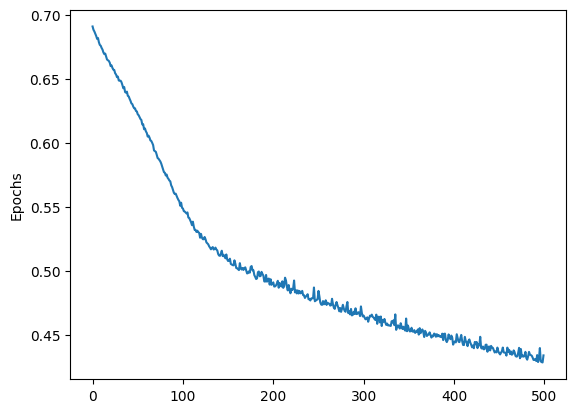

In [72]:
#plot the loss function
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.ylabel('Epochs')

In [73]:
predictions = network.forward(X_test)
predictions = (predictions >= 0.5)
accuracy_score(Y_test, predictions.detach().numpy())

0.7402597402597403

In [74]:
predictions = network.forward(X_val)
predictions = (predictions >= 0.5)
accuracy_score(Y_val, predictions.detach().numpy())

0.8311688311688312

In [3]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset from github
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

file_url = 'https://raw.githubusercontent.com/xinxiewu/datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(download_file(file_url))

# Diabetes Group
df.loc[(df['diabetes'] == 1) & (df['glucose'] == 0), 'glucose'] = 140
df.loc[(df['diabetes'] == 1) & (df['bp'] == 0), 'bp'] = 74
df.loc[(df['diabetes'] == 1) & (df['skin_thick'] == 0), 'skin_thick'] = 27
df.loc[(df['diabetes'] == 1) & (df['insulin'] == 0), 'insulin'] = 100
df.loc[(df['diabetes'] == 1) & (df['bmi'] == 0), 'bmi'] = 34.25
df.loc[(df['diabetes'] == 1) & (df['pedigree'] == 0), 'pedigree'] = 0.449
# Non-Diabetes Group
df.loc[(df['diabetes'] == 0) & (df['glucose'] == 0), 'glucose'] = 107
df.loc[(df['diabetes'] == 0) & (df['bp'] == 0), 'bp'] = 70
df.loc[(df['diabetes'] == 0) & (df['skin_thick'] == 0), 'skin_thick'] = 21
df.loc[(df['diabetes'] == 0) & (df['insulin'] == 0), 'insulin'] = 68.792
df.loc[(df['diabetes'] == 0) & (df['bmi'] == 0), 'bmi'] = 30.05
df.loc[(df['diabetes'] == 0) & (df['pedigree'] == 0), 'pedigree'] = 0.336

# Normalization
df.preg = (df.preg - df.preg.mean())/df.preg.std()
df.glucose = (df.glucose - df.glucose.mean())/df.glucose.std()
df.bp = (df.bp - df.bp.mean())/df.bp.std()
df.skin_thick = (df.skin_thick - df.skin_thick.mean())/df.skin_thick.std()
df.insulin = (df.insulin - df.insulin.mean())/df.insulin.std()
df.bmi = (df.bmi - df.bmi.mean())/df.bmi.std()
df.pedigree = (df.pedigree - df.pedigree.mean())/df.pedigree.std()
df.age = (df.age - df.age.mean())/df.age.std()

# 7:3 Data Split
x = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]

In [46]:
m = nn.MaxPool1d(2)
input = torch.randn(10, 16, 7)
output = m(input)
print(f"Input: {input.shape}")
print(f"Output: {output.shape}")

Input: torch.Size([10, 16, 7])
Output: torch.Size([10, 16, 3])
